# Data Analysis task (Project Gutenberg)

#### Importing required libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#### Load the data from the provided CSV files and display

In [9]:
metadata_path = 'SPGC-metadata-2018-07-18.csv'
kld_scores_path = 'KLDscores.csv'
extra_controls_path = 'extra_controls.csv'

metadata_df = pd.read_csv(metadata_path)
kld_scores_df = pd.read_csv(kld_scores_path)
extra_controls_df = pd.read_csv(extra_controls_path)

# Display the first few rows of each dataframe to understand their structure and contents
display(metadata_df.head(), kld_scores_df.head(), extra_controls_df.head())


,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text


,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2..."


,id,subj2_war,subj2_adventure,subj2_comedy,subj2_biography,subj2_romance,subj2_drama,subj2_fantasy,subj2_family,subj2_sciencefiction,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.388199,0.18372,0.001003,13193.0
3,PG10007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.301656,0.15722,0.002895,27980.0
4,PG10008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0


#### Perform data pre-processing on KLD scores and get new metrics out of the given list

We found out the below measures from the KLD lists provided
1. average
2. minimum
3. maximum
4. variance
5. slope

In [10]:
# Convert the 'kld_values' column from string to list of floats
kld_scores_df['kld_values'] = kld_scores_df['kld_values'].apply(eval)

# Initialize lists to store computed measures
kld_avg = []
kld_var = []
kld_min = []
kld_max = []
kld_slope = []

# Compute book-level measures for each book
for kld_list in kld_scores_df['kld_values']:
    kld_avg.append(np.mean(kld_list))
    kld_var.append(np.var(kld_list))
    kld_min.append(np.min(kld_list))
    kld_max.append(np.max(kld_list))
    
    # Compute slope of linear regression
    x = np.arange(len(kld_list))
    slope, _, _, _, _ = linregress(x, kld_list)
    kld_slope.append(slope)

# Add computed measures to the dataframe
kld_scores_df['kld_avg'] = kld_avg
kld_scores_df['kld_var'] = kld_var
kld_scores_df['kld_slope'] = kld_slope
kld_scores_df['kld_min'] = kld_min
kld_scores_df['kld_max'] = kld_max

# Display the updated dataframe
kld_scores_df.head()


,filename,kld_values,kld_avg,kld_var,kld_slope,kld_min,kld_max
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.192720,0.450747
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.206327,0.390158
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.003573,0.001259,0.200838,0.541167
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.204162,0.548940
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.000255,0.000054,0.189317,0.276054


#### Data cleaning in the metadata.csv file

Change the datatypes to required formats and merge the metadata and kld_scores files

In [11]:
# Ensure the 'id' columns match in format for merging
metadata_df['id'] = metadata_df['id'].str.replace('PG', '').astype(int)
kld_scores_df['filename'] = kld_scores_df['filename'].str.replace('PG', '').astype(int)
extra_controls_df['id'] = extra_controls_df['id'].str.replace('PG', '').astype(int)

# Rename columns for merging
kld_scores_df.rename(columns={'filename': 'id'}, inplace=True)

# Merge the dataframes
merged_df = pd.merge(metadata_df, kld_scores_df, on='id')
merged_df = pd.merge(merged_df, extra_controls_df, on='id')

# Display the first few rows of the merged dataframe
merged_df.head()


,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type,kld_values,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,79,Terminal Compromise,"Schwartau, Winn",NaN,NaN,['en'],21.0,"{'Computer security -- Fiction', 'Didactic fic...",Text,"[0.2757379259625541, 0.24798943716089544, 0.27...",...,0,0,0,0,0,1,0.171519,0.12578,0.007630,209058.0
1,102,The Tragedy of Pudd'nhead Wilson,"Twain, Mark",1835.0,1910.0,['en'],677.0,"{'Trials (Murder) -- Fiction', 'Impostors and ...",Text,"[0.279944221642895, 0.2578040453491282, 0.2843...",...,0,0,0,0,0,1,0.248672,0.13318,0.004250,52465.0
2,105,Persuasion,"Austen, Jane",1775.0,1817.0,['en'],2778.0,"{'Regency fiction', 'Ship captains -- Fiction'...",Text,"[0.216724940056036, 0.2165917910773945, 0.2422...",...,0,0,0,0,0,0,0.175747,0.16867,0.005280,82944.0
3,106,Jungle Tales of Tarzan,"Burroughs, Edgar Rice",1875.0,1950.0,['en'],225.0,"{'Tarzan (Fictitious character) -- Fiction', '...",Text,"[0.21957989250542345, 0.20715649423990418, 0.2...",...,0,0,0,0,0,0,0.209854,0.10250,0.004305,73714.0
4,107,Far from the Madding Crowd,"Hardy, Thomas",1840.0,1928.0,['en'],555.0,"{'Love stories', 'Wessex (England) -- Fiction'...",Text,"[0.22957419343700353, 0.20965547352173658, 0.2...",...,0,0,0,0,0,0,0.167575,0.12513,0.007081,136528.0


In [12]:
merged_df.columns

Index(['id', 'title', 'author', 'authoryearofbirth', 'authoryearofdeath',
       'language', 'downloads', 'subjects', 'type', 'kld_values', 'kld_avg',
       'kld_var', 'kld_slope', 'kld_min', 'kld_max', 'subj2_war',
       'subj2_adventure', 'subj2_comedy', 'subj2_biography', 'subj2_romance',
       'subj2_drama', 'subj2_fantasy', 'subj2_family', 'subj2_sciencefiction',
       'subj2_action', 'subj2_thriller', 'subj2_western', 'subj2_horror',
       'subj2_mystery', 'subj2_crime', 'subj2_history', 'subj2_periodicals',
       'subj2_others', 'speed', 'sentiment_avg', 'sentiment_vol', 'wordcount'],
      dtype='object')

- Drop null values from the merged dataframe 
- Filter the downloads column for any 0 values
- Split the data into dependent and independent features for our model building
- Perform any scaling techniques like Standard Scaling

In [14]:
# Drop any rows with missing values
merged_df = merged_df.dropna()

# Ensure 'downloads' are positive before taking log
merged_df = merged_df[merged_df['downloads'] > 0]

# Split the data into features (X) and target (y)
X = merged_df[['kld_avg', 'kld_var', 'kld_slope', 'subj2_war', 'subj2_adventure', 'subj2_comedy',
               'subj2_biography', 'subj2_romance', 'subj2_drama', 'subj2_fantasy',
               'subj2_family', 'subj2_sciencefiction', 'subj2_action', 'subj2_thriller',
               'subj2_western', 'subj2_horror', 'subj2_mystery', 'subj2_crime',
               'subj2_history', 'subj2_periodicals', 'subj2_others', 'speed',
               'sentiment_avg', 'sentiment_vol', 'wordcount']]
y = np.log(merged_df['downloads'])

# Drop any rows with inf or -inf values in y
y = y[np.isfinite(y)]
X = X.loc[y.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Analysis

### OLS Regression Analysis
The OLS regression results provide a comprehensive understanding of how each feature is related to the log of downloads. The summary of the OLS regression includes coefficients, standard errors, t-values, and p-values for each predictor variable. Significant predictors can be identified by their p-values. For instance, variables such as kld_avg, kld_var, and various subject genres can be scrutinized for their individual impacts on the downloads. The R-squared value indicates the proportion of variance in the log of downloads explained by the model, providing an overall measure of the model fit.

In [15]:
# Add a constant term for OLS
X_scaled_ols = sm.add_constant(X_scaled)

# Perform OLS regression
ols_model = sm.OLS(y, X_scaled_ols).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:              downloads   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     49.84
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          2.87e-210
Time:                        20:26:01   Log-Likelihood:                -10793.
No. Observations:                7129   AIC:                         2.163e+04
Df Residuals:                    7105   BIC:                         2.180e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0857      0.013    236.508      0.0

### LASSO Regression Analysis
LASSO regression is particularly useful for variable selection, especially when dealing with multicollinearity among predictors. By applying LASSO, the model shrinks the coefficients of less important variables to zero, thereby identifying the most influential predictors. The lasso_results dataframe lists the features in order of their importance. This analysis helps in understanding which features are most independently predictive of the log of downloads. Additionally, the LASSO path plot illustrates how coefficients change with different levels of regularization, providing insight into the stability of variable importance across a range of alpha values.

                 Feature  Importance
23         sentiment_vol    0.161396
22         sentiment_avg    0.140391
11  subj2_sciencefiction    0.130400
20          subj2_others    0.120169
9          subj2_fantasy    0.104949
15          subj2_horror    0.104722
2              kld_slope    0.086190
24             wordcount    0.052263
21                 speed    0.051155
16         subj2_mystery    0.031650
4        subj2_adventure    0.019092
7          subj2_romance    0.016827
19     subj2_periodicals    0.015234
1                kld_var    0.014385
3              subj2_war    0.005705
17           subj2_crime    0.000000
18         subj2_history    0.000000
0                kld_avg    0.000000
14         subj2_western    0.000000
13        subj2_thriller    0.000000
10          subj2_family    0.000000
8            subj2_drama    0.000000
6        subj2_biography    0.000000
5           subj2_comedy    0.000000
12          subj2_action    0.000000


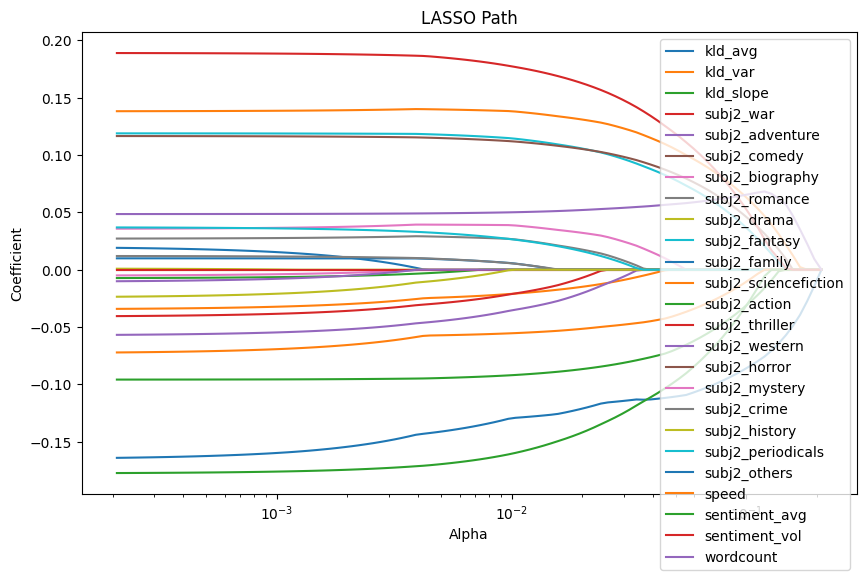

In [16]:
# Perform LASSO regression
lasso = LassoCV(cv=5).fit(X_scaled, y)
importance = np.abs(lasso.coef_)
features = X.columns

lasso_results = pd.DataFrame({'Feature': features, 'Importance': importance})
lasso_results = lasso_results.sort_values(by='Importance', ascending=False)
print(lasso_results)

# Check LASSO path
alphas_lasso, coefs, _ = lasso_path(X_scaled, y, alphas=lasso.alphas_)

plt.figure(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.plot(alphas_lasso, coefs[i, :], label=features[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('LASSO Path')
plt.legend()
plt.show()

### Variable analysis

Based on the feature importance scores provided, the variables that are most independently predictive of log(downloads) are ranked by their importance scores:

1. sentiment_vol (Importance: 0.161396)
2. sentiment_avg (Importance: 0.140391)
3. subj2_sciencefiction (Importance: 0.130400)
4. subj2_others (Importance: 0.120169)
5. subj2_fantasy (Importance: 0.104949)
6. subj2_horror (Importance: 0.104722)
7. kld_slope (Importance: 0.086190)
8. wordcount (Importance: 0.052263)
9. speed (Importance: 0.051155)
These variables have higher importance scores relative to the others listed, suggesting they have a stronger predictive power for log(downloads) in your model. It's important to interpret these scores in the context of your specific regression model or feature selection process to understand their impact on predicting the dependent variable effectively.

### Variables and its explanations

- kld_avg: The average of KLD values for each book.
- kld_var: The variance of KLD values for each book.
- kld_slope: The slope of the linear regression fitted to KLD values across time for each book.
- kld_min: The minimum of KLD values for each book.
- kld_max: The maximum of KLD values for each book.
- subj2_ variables*: Binary indicators for the presence of specific subjects (e.g., war, adventure, comedy, etc.).
- speed: A control variable indicating the reading speed.
- sentiment_avg: The average sentiment score of the book's text.
- sentiment_vol: The volume or variability of sentiment within the book.
- wordcount: The total word count of the book.